<a href="https://colab.research.google.com/github/Lotfullah21/Machine-Learning/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiple Linear Regression:
## Important Questions
* Is there at least one of the predictors X1,X2,...,XP useful in predicting the response ?
* Do all predictors help to explain Y, or is only a subset of the predictor is useful ? 
* How well does the model fit the data ?
* Given a set of predictor values, what response value should we predict , and how accurate is our prediction ? 

### Brief Steps
* **step 1: Is there a Relationship between the Response and Prediction**
* **step 2: Deciding on Important Variables**
* **step 3: Model Fit** 
* **step 4: Prediction** 

## Polynomial Regression
in some cases the true realtionship between the response and the predictors may be non-linear, we extend the linear model to accommodate non_linear relationship using **polynomial regression.**
Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods.
* we simply put $$ X1 = X$$
$$ X2 = X^2$$
$$ X3 = X^3 $$
and so on, because our model does not depeneds match on feature but on parameters **Theta**, this how we transform the polynomial regression model into linear regression model.

* 1. $$ Y = B0+B1X+B2X^2+B3X^3,...,BnX^n$$
* 2. now it is multiple linear regression
* 3. use Least Square method which minimizes the sum of square erros between Y and Y_pred.
we can see from above equation that the Y is linear with respect to Theta, that is the most important thing, it means the fearure variation does not have that much effect as parameters **(Theta)**

Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta\_1  x + \theta\_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**?


## Importing Libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Download the Data


In [92]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-05-29 17:09:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.06s   

2022-05-29 17:09:45 (1.10 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Explore the data 


In [93]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [94]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Check for Specific Series(Columns)


In [95]:
sdf = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
sdf.head(10)

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,4,2.0,9.9,6.7,33,8.5,196
1,4,2.4,11.2,7.7,29,9.6,221
2,4,1.5,6.0,5.8,48,5.9,136
3,6,3.5,12.7,9.1,25,11.1,255
4,6,3.5,12.1,8.7,27,10.6,244
5,6,3.5,11.9,7.7,28,10.0,230
6,6,3.5,11.8,8.1,28,10.1,232
7,6,3.7,12.8,9.0,25,11.1,255
8,6,3.7,13.4,9.5,24,11.6,267
9,4,2.4,10.6,7.5,31,9.2,212


## Plotting the features agains our dependent varible (CO2Emissions)

Text(0, 0.5, 'Co2Emission')

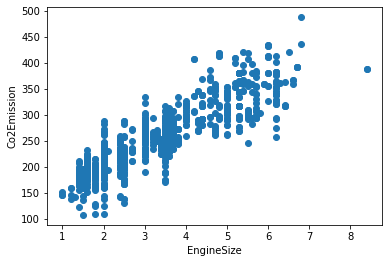

In [96]:
plt.scatter(df['ENGINESIZE'],df['CO2EMISSIONS'])
plt.xlabel('EngineSize')
plt.ylabel('Co2Emission')
# label="Engine",color = "red"

Text(0, 0.5, 'Co2Emission')

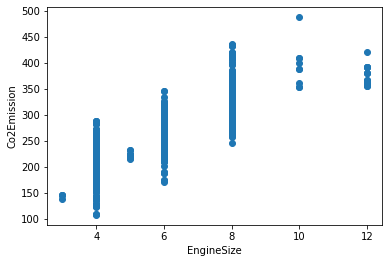

In [97]:
plt.scatter(df.CYLINDERS,df.CO2EMISSIONS)
plt.xlabel('EngineSize')
plt.ylabel('Co2Emission')

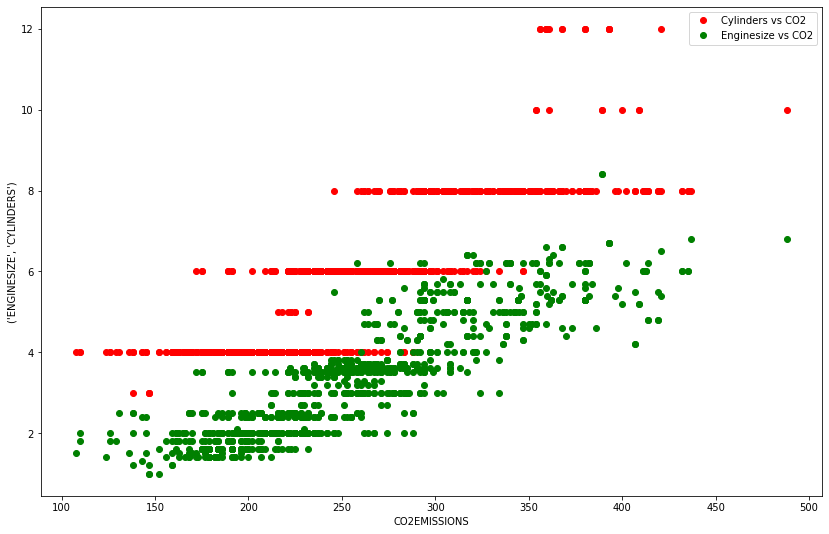

In [98]:
plt.figure(figsize = (14,9))
plt.plot(df.CO2EMISSIONS,df.CYLINDERS,'bo',label = "Cylinders vs CO2",color="red")
plt.plot(df.CO2EMISSIONS,df.ENGINESIZE,'bo',label = "Enginesize vs CO2",color="green")
plt.legend()
plt.xlabel("CO2EMISSIONS")
plt.ylabel(('ENGINESIZE','CYLINDERS'))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f57b5b17bd0>,
      dtype=object)

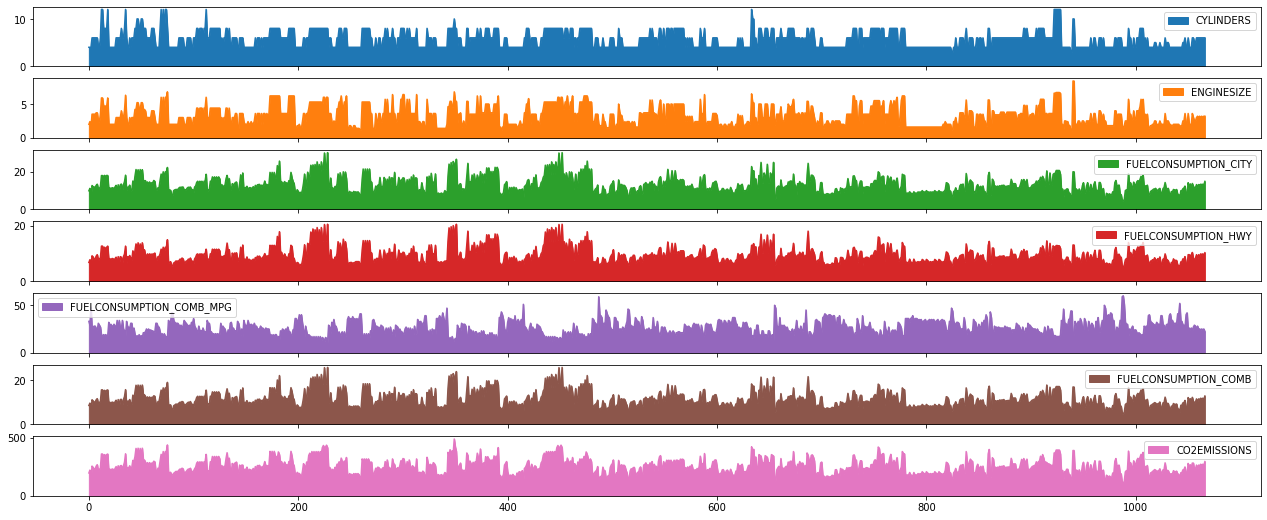

In [99]:
sdf.plot.area(figsize=(22, 9), subplots=True)

## Create Training and Testing datasets


In [100]:
mask = np.random.rand(len(df))<0.8
train_data = df[mask]
test_data = df[~mask]

We have different kind of plotting to take advantage of and get more insight about our data, from above graphs can come to a conclusion that as engisize increase we see an increase in Co2Eission also

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, *ENGINESIZE*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Preparing training and test feature
train_x = np.asanyarray(train_data[["ENGINESIZE"]])
test_x = np.asanyarray(test_data[["ENGINESIZE"]])
# preparing training and test labels
train_label  = np.asanyarray(train_data[["CO2EMISSIONS"]])
test_label = np.asanyarray(test_data[["CO2EMISSIONS"]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

In [102]:
poly_data = PolynomialFeatures(degree=2)
train_x_poly = poly_data.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

## Using Linear model


In [103]:
Regression = linear_model.LinearRegression()
train_y_pred = Regression.fit(train_x_poly,train_label)


## Finding The Coefficients

In [104]:
print ('Coefficients: ', Regression.coef_)
print ('Intercept: ',Regression.intercept_)

Coefficients:  [[ 0.         51.43310323 -1.65240384]]
Intercept:  [105.91479883]


## Lets put the parameters 
As mentioned before, **Coefficient** and **Intercept** , are the parameters of the fit curvy line.
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:
as we mentioned earlier the polynomial equation would look like:

$$y = b + \theta\_1  x + \theta\_2 x^2$$

### we found the two coeffients and one intercept point, now lets put all together



Text(0, 0.5, 'Emission')

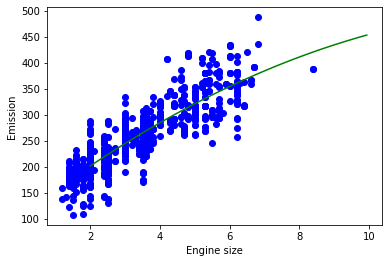

In [105]:
plt.scatter(train_data.ENGINESIZE,train_data.CO2EMISSIONS,color='blue',alpha = 1)
X = np.arange(2,10,0.13)
Y = Regression.intercept_[0]+Regression.coef_[0][1]*X + Regression.coef_[0][2]*np.power(X,2)
plt.plot(X,Y,color = "green",alpha = 1)
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation
(coefficient of determination) regression score function. R^2

* Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a  score of 0.0.
*  It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.
$$R2= 1- SSres / SStot$$
* SSres is the sum of squares of the residual errors.

* SStot is the total sum of the errors.
* **R2 indicates the proportion of data points which lie within the line created by the regression equation.**


In [111]:
from sklearn.metrics import r2_score


test_x_poly = poly_data.transform(test_x)
test_y_ = Regression.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_label)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_label) ** 2))
print("R2-score: %.2f" % r2_score(test_label,test_y_ ) )


Mean absolute error: 19.58
Residual sum of squares (MSE): 601.18
R2-score: 0.81


**0.81 means 81% of data lies within the line plotted by the model and can be explained by model**


**Sources:**
* IBM Course, coursera 
* an introductio to statistical learning with appliaction R 
* pattern Recognition and machine learning
* Geeks for geeks